In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv("price.csv")

In [2]:
data=data[data['date_日期'].apply(lambda x:not x=="date_日期")]
data.rename(columns={'date_日期':'date',"price_价格":"price","title_名称":"title"},inplace=True)
data['price'] = data['price'].astype('float')
data.drop_duplicates(['date','title'],inplace=True)

In [3]:
data

,date,price,title
0,2019-08-20,139.0,【直营】日本进口PITTA防尘透气口罩秋冬季口罩白色3片装*4袋
1,2019-08-21,139.0,【直营】日本进口PITTA防尘透气口罩秋冬季口罩白色3片装*4袋
2,2019-08-22,139.0,【直营】日本进口PITTA防尘透气口罩秋冬季口罩白色3片装*4袋
3,2019-08-23,139.0,【直营】日本进口PITTA防尘透气口罩秋冬季口罩白色3片装*4袋
4,2019-08-24,139.0,【直营】日本进口PITTA防尘透气口罩秋冬季口罩白色3片装*4袋
...,...,...,...
274340,2020-05-30,128.0,桑尚100桑蚕丝小学生口罩宝宝儿童真丝口鼻罩女男童防晒防敏可洗
274341,2020-06-01,128.0,桑尚100桑蚕丝小学生口罩宝宝儿童真丝口鼻罩女男童防晒防敏可洗
274342,2020-06-02,55.0,桑尚100桑蚕丝小学生口罩宝宝儿童真丝口鼻罩女男童防晒防敏可洗
274343,2020-06-03,128.0,桑尚100桑蚕丝小学生口罩宝宝儿童真丝口鼻罩女男童防晒防敏可洗


In [4]:
price=data.groupby('date')['price'].mean()
price=pd.DataFrame(price)
#meanPrice.to_csv("123.csv")

In [5]:
price['max']=data.groupby('date')['price'].max()

In [6]:
def shiftReduce(x):
    return x-x.shift(1)
data['increasePrice']=data[['price','title']].groupby('title').apply(shiftReduce)

In [7]:
increaseData=data.dropna()
increaseData['isIncrease']=increaseData['increasePrice']>=0
increasePriceData=increaseData[['date','isIncrease']].groupby('date').sum()
increasePriceData['sum']=increaseData[['date','isIncrease']].groupby('date').count()

In [8]:
increaseShopData=data[['date','title']].groupby('date').count()
increaseShopData['increaseShop']=increaseShopData['title']-increaseShopData['title'].shift(1)

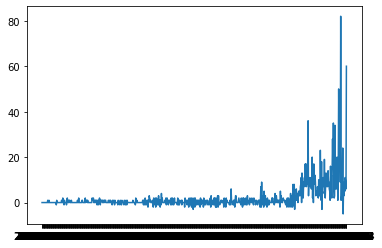

In [9]:
plt.figure()
plt.plot(increaseShopData.iloc[:,1].dropna())
plt.show()

In [10]:
import scipy.stats as stats
stats.shapiro(increaseShopData.loc[:'2019-12-14','increaseShop'].dropna())

(0.8229141235351562, 8.975996617641654e-25)

In [14]:
price['increaseShop']=increaseShopData.iloc[:,1]
price['increasePirce']=price['price']-price['price'].shift(1)

,price,max,increaseShop,increasePirce
date,,,,
2018-05-04,40.713478,198.0,NaN,NaN
2018-05-05,40.818261,198.0,0.0,0.104783
2018-05-06,40.738261,198.0,0.0,-0.080000
2018-05-07,40.569130,198.0,0.0,-0.169130
2018-05-08,40.426957,198.0,0.0,-0.142174
...,...,...,...,...
2020-05-30,56.989896,900.0,5.0,-0.431062
2020-06-01,57.060523,900.0,11.0,0.070627
2020-06-02,56.515837,900.0,9.0,-0.544686


In [18]:
price.loc[:'2019-12-14',:].dropna().corr('spearman')

,price,max,increaseShop,increasePirce
price,1.000000,0.787647,0.007459,0.042908
max,0.787647,1.000000,0.025636,-0.016911
increaseShop,0.007459,0.025636,1.000000,-0.165118
increasePirce,0.042908,-0.016911,-0.165118,1.000000


In [28]:
price.dropna().corr('spearman')

,price,max,increaseShop,increasePirce
price,1.000000,0.893593,0.398862,0.009478
max,0.893593,1.000000,0.426256,-0.034563
increaseShop,0.398862,0.426256,1.000000,-0.152365
increasePirce,0.009478,-0.034563,-0.152365,1.000000


In [19]:
price.loc['2019-12-14':,:].dropna().corr('spearman')

,price,max,increaseShop,increasePirce
price,1.000000,0.559106,0.048098,-0.004124
max,0.559106,1.000000,0.395492,-0.183196
increaseShop,0.048098,0.395492,1.000000,-0.143312
increasePirce,-0.004124,-0.183196,-0.143312,1.000000


In [20]:
price.loc['2019-12-14':'2020-02-14',:].dropna().corr('spearman')

,price,max,increaseShop,increasePirce
price,1.000000,0.853238,0.349982,-0.122581
max,0.853238,1.000000,0.316548,-0.164523
increaseShop,0.349982,0.316548,1.000000,-0.161949
increasePirce,-0.122581,-0.164523,-0.161949,1.000000


In [24]:
price.dropna().to_csv("monthIncrease.csv")